In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [3]:
import pathlib
import tensorflow as tf
from PIL import Image

# Set the path to your local directory
data_dir = pathlib.Path("F:/ADITYA SIR/ROSE - CNN")

In [4]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4342 files belonging to 3 classes.
Using 3474 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4342 files belonging to 3 classes.
Using 868 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Black Spot', 'Downy Mildew', 'Fresh Leaf']


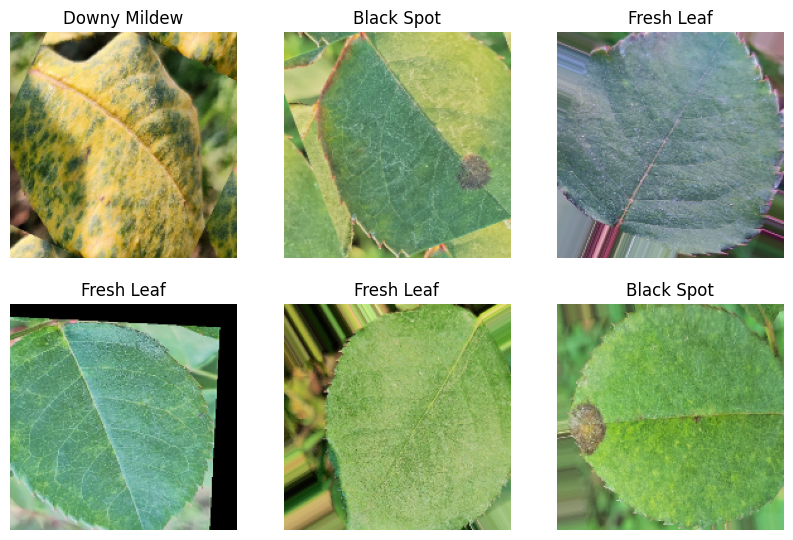

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(180, 180, 3),
    pooling='avg',
    weights='imagenet'
)

# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Define the input layer
input_tensor = Input(shape=(180, 180, 3))

# Pass the input through the pre-trained model
x = pretrained_model(input_tensor)

# Add additional layers on top of the pre-trained model
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output_tensor = Dense(5, activation='softmax')(x)

# Create the final model
resnet_model = Model(inputs=input_tensor, outputs=output_tensor)

# Print the model summary
resnet_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Compile the model with the updated learning rate argument
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Define the ResNet50 model with 3 output classes
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(180, 180, 3),
    pooling='avg',
    weights='imagenet'
)

# Freeze the pre-trained layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Define the input layer
input_tensor = Input(shape=(180, 180, 3))

# Pass the input through the pre-trained model
x = pretrained_model(input_tensor)

# Add additional layers on top
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output_tensor = Dense(3, activation='softmax')(x)  # Adjusted for 3 classes

# Create the final model
resnet_model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model with categorical crossentropy
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Assuming you have integer labels, convert to one-hot encoding
train_ds = train_ds.map(lambda x, y: (x, to_categorical(y, num_classes=3)))
val_ds = val_ds.map(lambda x, y: (x, to_categorical(y, num_classes=3)))

# Fit the model
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 531s 4s/step - accuracy: 0.8200 - loss: 0.5225 - val_accuracy: 0.9620 - val_loss: 0.1133
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.9701 - loss: 0.0847 - val_accuracy: 0.9712 - val_loss: 0.0779
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9839 - loss: 0.0427 - val_accuracy: 0.9816 - val_loss: 0.0580
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.9893 - loss: 0.0325 - val_accuracy: 0.9862 - val_loss: 0.0535
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.9781 - val_loss: 0.0651
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.9879 - loss: 0.0371 - val_accuracy: 0.9885 - val_loss: 0.0367
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.9937 - loss: 0.0167 - val_accuracy: 0.9850 - val_loss: 0.0323
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9976 - loss: 0.0049 - val_accu

In [12]:
resnet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,739,595 (102.00 MB)

 Trainable params: 1,050,627 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,101,256 (8.02 MB)

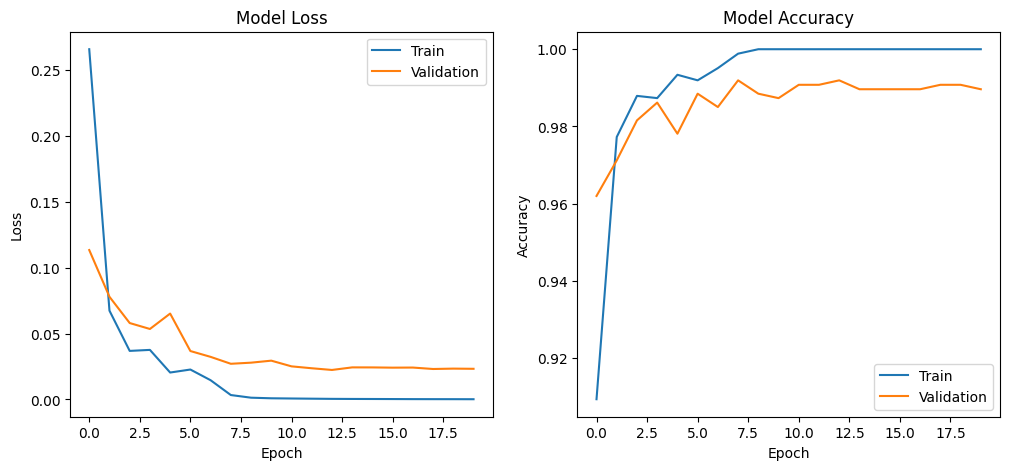

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

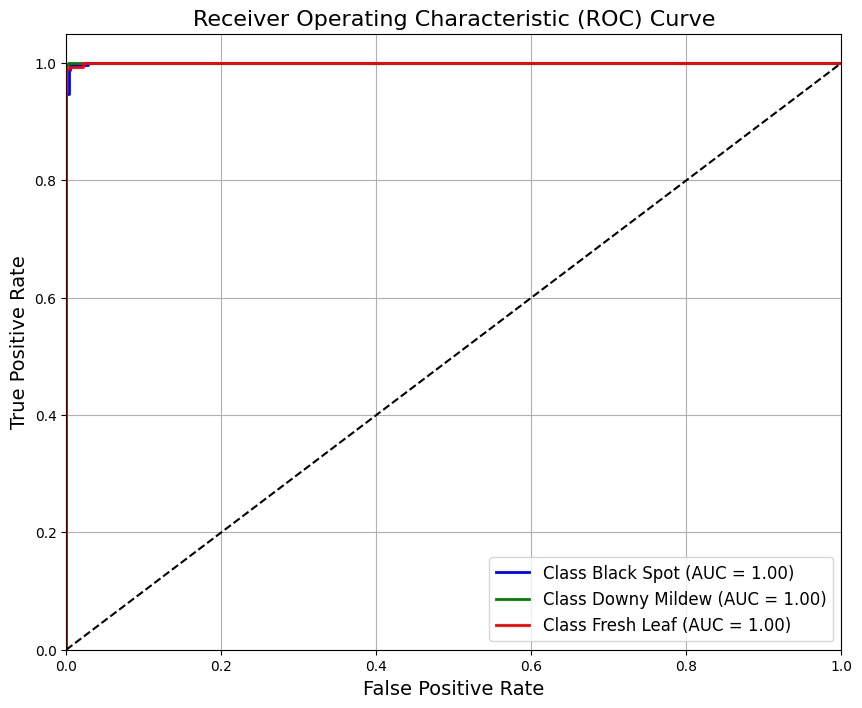

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Get prediction probabilities
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = resnet_model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(preds)

# Convert to binary labels for ROC
y_true_bin = label_binarize(y_true, classes=range(3))
y_pred_bin = np.array(y_pred)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))

colors = ['blue', 'green', 'red']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

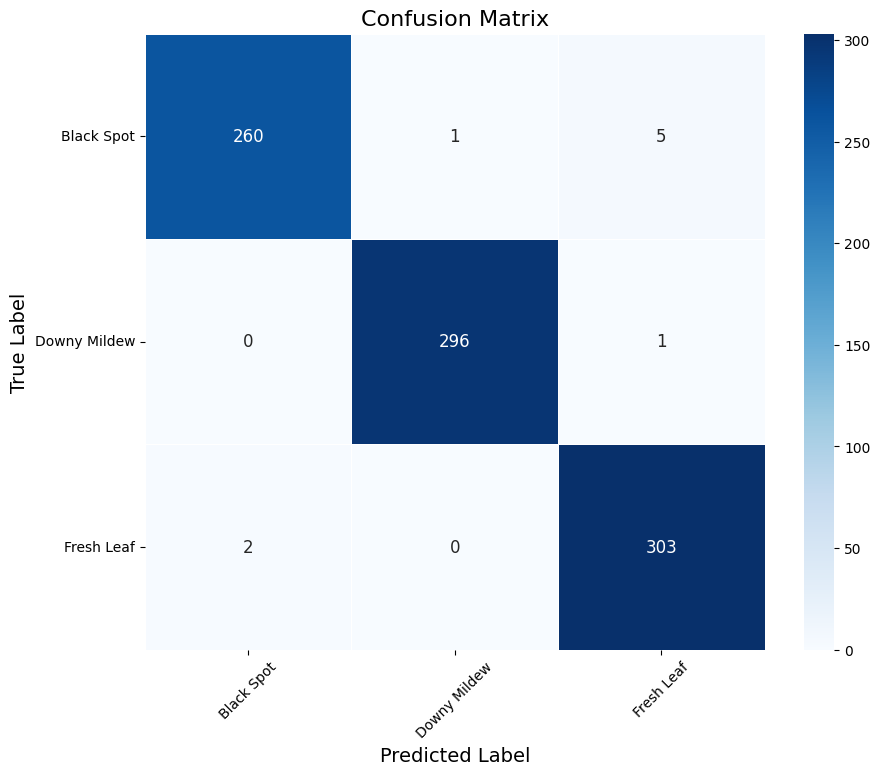

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predictions and true labels
val_labels = []
val_preds = []

for images, labels in val_ds:
    preds = resnet_model.predict(images)
    val_labels.extend(np.argmax(labels, axis=1))
    val_preds.extend(np.argmax(preds, axis=1))

# Compute confusion matrix
cm = confusion_matrix(val_labels, val_preds, labels=range(3))

# Create a DataFrame for better plotting with seaborn
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=class_names, yticklabels=class_names, 
            annot_kws={"size": 12}, linewidths=.5)

plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()


# Evaluating The Model

# Making Predictions

In [18]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


NameError: name 'roses' is not defined

In [45]:
pred=resnet_model.predict(image)
print(pred)

[[8.2068445e-06 1.5209365e-06 9.9347222e-01 9.5006551e-05 6.4231041e-03]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
